In [1]:
import numpy as np
from tensorflow import keras
import utils

## Flat data

### Train

In [2]:
(x_train, y_train), (x_val, y_val), (x_test, y_test) = utils.load_time_series_data()
print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (7000, 50), y_train.shape = (7000,)
x_val.shape = (2000, 50), y_val.shape = (2000,)
x_test.shape = (1000, 50), y_test.shape = (1000,)


In [3]:
utils.reset_session()

model = keras.models.Sequential([
    keras.layers.Dense(1, input_shape=[50])
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
219/219 [==============================] - 0s 942us/step - loss: 0.1001 - mae: 0.2559 - val_loss: 0.0545 - val_mae: 0.1905
Epoch 2/20
219/219 [==============================] - 0s 551us/step - loss: 0.0379 - mae: 0.1584 - val_loss: 0.0266 - val_mae: 0.1331
Epoch 3/20
219/219 [==============================] - 0s 615us/step - loss: 0.0202 - mae: 0.1162 - val_loss: 0.0157 - val_mae: 0.1026
Epoch 4/20
219/219 [==============================] - 0s 615us/step - loss: 0.0131 - mae: 0.0937 - val_loss: 0.0116 - val_mae: 0.0880
Epoch 5/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0103 - mae: 0.0826 - val_loss: 0.0098 - val_mae: 0.0803
Epoch 6/20
219/219 [==============================] - 0s 1ms/step - loss: 0.0089 - mae: 0.0763 - val_loss: 0.0087 - val_mae: 0.0754
Epoch 7/20
219/219 [==============================] - 0s 583us/step - loss: 0.0080 - mae: 0.0720 - val_loss: 0.0079 - val_mae: 0.0720
Epoch 8/20
219/219 [==============================] - 0s 594us/ste

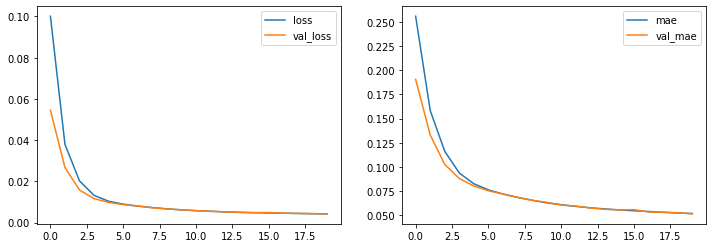

In [4]:
utils.plot_history(history)

### Evaluate

In [5]:
model.evaluate(x_val, y_val)

63/63 [==============================] - 0s 424us/step - loss: 0.0042 - mae: 0.0514


[0.004168087150901556, 0.05144257843494415]

### Forecast

In [6]:
y_pred = model.predict(x_val)
utils.evaluate(y_val, y_pred[:, 0])

mse = 0.00416809, mae = 0.05144258


## Extra dimension

In [7]:
x_train = np.expand_dims(x_train, -1)
x_val = np.expand_dims(x_val, -1)
x_test = np.expand_dims(x_test, -1)
print(f"x_train.shape = {x_train.shape}, y_train.shape = {y_train.shape}")
print(f"x_val.shape = {x_val.shape}, y_val.shape = {y_val.shape}")
print(f"x_test.shape = {x_test.shape}, y_test.shape = {y_test.shape}")

x_train.shape = (7000, 50, 1), y_train.shape = (7000,)
x_val.shape = (2000, 50, 1), y_val.shape = (2000,)
x_test.shape = (1000, 50, 1), y_test.shape = (1000,)


In [8]:
utils.reset_session()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
219/219 [==============================] - 0s 962us/step - loss: 0.1001 - mae: 0.2559 - val_loss: 0.0545 - val_mae: 0.1905
Epoch 2/20
219/219 [==============================] - 0s 597us/step - loss: 0.0379 - mae: 0.1584 - val_loss: 0.0266 - val_mae: 0.1331
Epoch 3/20
219/219 [==============================] - 0s 592us/step - loss: 0.0202 - mae: 0.1162 - val_loss: 0.0157 - val_mae: 0.1026
Epoch 4/20
219/219 [==============================] - 0s 602us/step - loss: 0.0131 - mae: 0.0937 - val_loss: 0.0116 - val_mae: 0.0880
Epoch 5/20
219/219 [==============================] - 0s 608us/step - loss: 0.0103 - mae: 0.0826 - val_loss: 0.0098 - val_mae: 0.0803
Epoch 6/20
219/219 [==============================] - 0s 623us/step - loss: 0.0089 - mae: 0.0763 - val_loss: 0.0087 - val_mae: 0.0754
Epoch 7/20
219/219 [==============================] - 0s 762us/step - loss: 0.0080 - mae: 0.0720 - val_loss: 0.0079 - val_mae: 0.0720
Epoch 8/20
219/219 [==============================] - 0s 748us

In [9]:
model.evaluate(x_val, y_val)

63/63 [==============================] - 0s 553us/step - loss: 0.0042 - mae: 0.0514


[0.004168087150901556, 0.05144257843494415]